***SMS Spam Filtering***<br>
The sms spam filtering is a binary classification task used to group the sms data into two class labels namely:<br>
- Spam <br>
- Not Spam<br>  
Dataset is taken from the link:https://archive.ics.uci.edu/ml/datasets/sms+spam+collection <br>
The class label "ham" represents the non-spam sms in dataset<br>

In [1]:
#importing the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
dataset = pd.read_csv('SMSSpamCollection', sep='\t', names=['Class', 'Messages'])
dataset.head()

,Class,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Observations from the ouput**<br>
- The dataset consists of 2 columns:<br>
    - Messages: input messages <br>
    - Class : labels <br>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Observations from the output** <br>
- The dataset contains 5572 instances/examples represented in rows and 1 class target variable

In [4]:
dataset['Class'].unique()

array(['ham', 'spam'], dtype=object)

In [5]:
dataset.groupby('Class').describe()

Messages                                                               
         count unique                                                top freq
Class                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

**Observations from the output** <br>
- Dataset contains 4825 ham(non-spam) messages and 747 spam messages <br>
- Class Distribution: About 86.6% messages are non-spam messages <br>

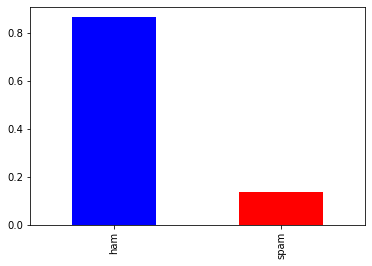

In [6]:
#Exploratory Data Analysis using univariate analysis
dataset['Class'].value_counts(normalize=True).plot.bar(color=['blue', 'red'])
plt.show()

In [7]:
#one hot encoding
dataset['spam']=dataset['Class'].apply(lambda x:1 if x=='spam' else 0)
dataset.head()

,Class,Messages,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.Messages,dataset.spam)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_train_count = tf.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_count.toarray(),y_train)
X_test_count = tf.transform(X_test)
accuracy=model.score(X_test_count.toarray(), y_test)
print("Accuracy =", accuracy)

Accuracy = 0.8944723618090452


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)
X_test_count = tf.transform(X_test)
accuracy=model.score(X_test_count, y_test)
print("Accuracy =", accuracy)

Accuracy = 0.9856424982053122


**Observations from output**
The accuracy observed by using Tfidfvectorization with GaussianNB is lower than the accuracy obtained by using CountVectorization with multinomial NB.Thus, NLP along with multinomialNB can provide better predictions